
# Purpose: Linear Regression Analysis
# Author: Na Qian
data source: https://docs.google.com/spreadsheets/d/e/2PACX-1vQJyZXPL7BF7zBsObirBYlXfeeG3oITymKt_x22J1FTsWlWluYxHKASR1-9QAEnximmX4z-vm98O9H4/pub?gid=290006635&single=true&output=csv


# Import necessary packages

In [24]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from numpy.random import seed
from numpy.random import randn
from scipy.stats import f_oneway
from pylab import rcParams
rcParams['figure.figsize'] = (15, 6)
sns.set_style('whitegrid')

# Acquire data and perform light modifictions

In [25]:
data_path="https://docs.google.com/spreadsheets/d/e/2PACX-1vQJyZXPL7BF7zBsObirBYlXfeeG3oITymKt_x22J1FTsWlWluYxHKASR1-9QAEnximmX4z-vm98O9H4/pub?gid=290006635&single=true&output=csv"
df = pd.read_csv(data_path)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3974 non-null   int64  
 1   country                 3974 non-null   object 
 2   state                   3781 non-null   object 
 3   neighbourhood_cleansed  3974 non-null   object 
 4   property_type           3974 non-null   object 
 5   square_meters           3974 non-null   float64
 6   price                   3974 non-null   object 
 7   room_type               3974 non-null   object 
 8   bathrooms               3969 non-null   float64
 9   bedrooms                3972 non-null   float64
 10  beds                    3973 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 341.6+ KB


In [27]:
df.head()

,id,country,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
0,3363954,Australia,NSW,BALLINA SHIRE COUNCIL,House,0.00,"$2,900.00",Entire home/apt,3.0,4.0,4.0
1,13048065,Australia,NSW,BALLINA SHIRE COUNCIL,House,1.55,$28.00,Private room,1.0,1.0,1.0
2,1451202,Australia,NSW,BALLINA SHIRE COUNCIL,Guest suite,15.00,$141.00,Entire home/apt,1.0,1.0,1.0
3,2345959,Australia,NSW,BALLINA SHIRE COUNCIL,House,16.43,$50.00,Private room,4.0,4.0,3.0
4,26087141,Australia,NSW,BALLINA SHIRE COUNCIL,House,17.79,$52.00,Private room,1.0,1.0,1.0


In [28]:
#conver price's data type from string to float
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [29]:
df.price.sort_values().head(20)

3115     1.0
1       28.0
3075    30.0
455     30.0
459     35.0
454     36.0
457     38.0
3074    40.0
458     40.0
2994    40.0
3025    40.0
2960    42.0
3043    43.0
2975    43.0
470     44.0
2969    45.0
462     45.0
463     45.0
6       45.0
2971    45.0
Name: price, dtype: float64

In [30]:
df.price.sort_values().tail(20)

2879     5191.0
2937     5220.0
2924     5285.0
2942     5294.0
2873     5600.0
2920     5901.0
2889     5951.0
2893     5995.0
2927     6000.0
2899     6196.0
2915     6226.0
2943     6250.0
2939     6500.0
2928     6595.0
2941     6750.0
2947     7000.0
3051     7190.0
2944     7540.0
2945    10047.0
2946    11500.0
Name: price, dtype: float64

In [31]:
df["state"].value_counts()

NSW                3609
New South Wales     115
QLD                  46
Nsw                   4
nsw                   3
Qld                   2
queensland            1
Queensland            1
Name: state, dtype: int64

In [32]:
# Replace New South Wales, nsw and Nsw as NSW
df['state'] = df['state'].replace({'New South Wales':'NSW','nsw':"NSW",'Nsw':'NSW','Qld':'QLD','Queensland':'QLD','queensland':'QLD'},regex = True)


In [33]:
df["state"].value_counts()

NSW    3731
QLD      50
Name: state, dtype: int64

In [34]:
df["neighbourhood_cleansed"].value_counts()

BYRON SHIRE COUNCIL        2496
TWEED SHIRE COUNCIL         880
BALLINA SHIRE COUNCIL       453
LISMORE CITY COUNCIL        127
RICHMOND VALLEY COUNCIL      18
Name: neighbourhood_cleansed, dtype: int64

In [35]:
df['room_type'].value_counts()

Entire home/apt    3222
Private room        749
Shared room           3
Name: room_type, dtype: int64

In [23]:
df['property_type'].value_counts()

House           2331
Apartment        857
Guest suite      260
Guesthouse       218
Camper/RV         42
Loft              23
Nature lodge      23
Other             19
Name: property_type, dtype: int64

In [36]:
#Trim outliers:
starting_price = df['price'].quantile(.01)
ending_price = df['price'].quantile(.99)
starting_square_meters = df['square_meters'].quantile(.01)
ending_square_meters = df['square_meters'].quantile(.99)
df_trimmed = df.loc[(df['price'] > starting_price) & (df['price'] < ending_price) & (df['square_meters'] > starting_square_meters) & (df['square_meters'] <ending_square_meters)]
#Peform additional conversions to 
df_trimmed_cleaned = df_trimmed.copy()
#Perform filters to focus on specific areas
df_filtered = df_trimmed.loc[(df_trimmed['state'].isin(['NSW']))]
df_filtered = df_filtered.loc[(df_filtered['neighbourhood_cleansed'].isin(['BYRON SHIRE COUNCIL']))]
df_filtered = df_filtered.loc[(df_filtered['property_type'] == 'House')]
df_filtered = df_filtered.loc[(df_filtered['room_type'] == 'Entire home/apt')]


In [37]:
df_filtered.head()

,id,country,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
580,23906053,Australia,NSW,BYRON SHIRE COUNCIL,House,19.29,85.0,Entire home/apt,1.0,0.0,1.0
586,20332367,Australia,NSW,BYRON SHIRE COUNCIL,House,18.41,79.0,Entire home/apt,1.0,0.0,1.0
594,13484355,Australia,NSW,BYRON SHIRE COUNCIL,House,20.40,100.0,Entire home/apt,1.5,3.0,4.0
639,11660091,Australia,NSW,BYRON SHIRE COUNCIL,House,21.02,115.0,Entire home/apt,1.0,2.0,2.0
642,20873919,Australia,NSW,BYRON SHIRE COUNCIL,House,20.65,128.0,Entire home/apt,1.0,1.0,1.0


#  Column list:

id - the id number of a record

country - the country of a record -- only "Australia" is included

state - the state of a record(e.g., NSW,QLD,)--Only "NSW" is included

neighbourhood_cleansed - A modified version of the neighborhood that can be used for grouping -- Only "BYRON SHIRE COUNCIL" is included

property_type - The type of property that is being listed (e.g., house, apartent, loft)--Only "House" is included

square_meters - The size of the Airbnb home in unit sq footage.

price - The cost of the rental per night in USD.

room_type - The type of room that is available for rent (e.g., a shared room)---Only "Entire home/apt" is included.

bedrooms - The count of bedrooms available (e.g., 0, 1, 2).

bathrooms - The count of bathrooms available (e.g., 1, 2, 1.5).

beds - The count of beds available in the rental (e.g., 0, 1, 2).




# Describe quantitative variables

In [38]:
df_filtered.describe()

,id,square_meters,price,bathrooms,bedrooms,beds
count,1.178000e+03,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000
mean,1.763836e+07,30.020458,1293.271647,2.041596,3.192699,4.105263
std,9.556176e+06,3.556916,856.590077,0.927702,1.153936,1.916912
min,2.817860e+05,18.410000,79.000000,0.000000,0.000000,0.000000
25%,9.794766e+06,27.992500,653.500000,1.000000,3.000000,3.000000
50%,1.805329e+07,30.390000,1100.000000,2.000000,3.000000,4.000000
75%,2.429335e+07,32.410000,1712.000000,2.500000,4.000000,5.000000
max,3.423125e+07,37.770000,4000.000000,9.000000,12.000000,18.000000


# Describe qualitative variables

In [39]:
df_filtered[['country','state','neighbourhood_cleansed','property_type','room_type']].describe()

,country,state,neighbourhood_cleansed,property_type,room_type
count,1178,1178,1178,1178,1178
unique,1,1,1,1,1
top,Australia,NSW,BYRON SHIRE COUNCIL,House,Entire home/apt
freq,1178,1178,1178,1178,1178


# Graphical Portion

Text(0.5, 0, 'price($)')

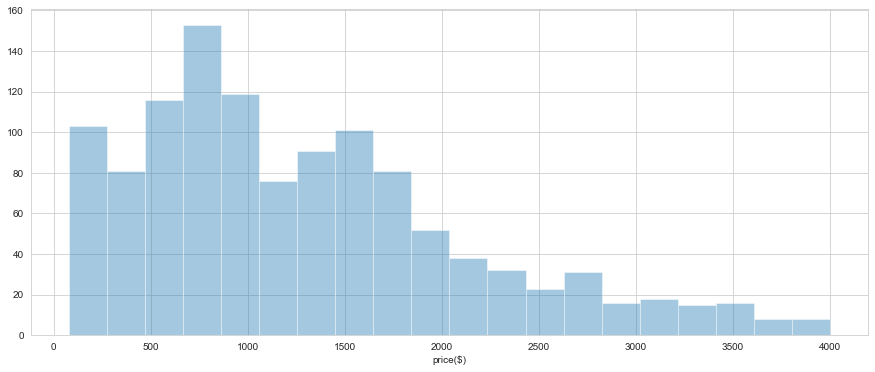

In [42]:
sns.distplot(df_filtered['price'],kde=False)
plt.xlabel('price($)')

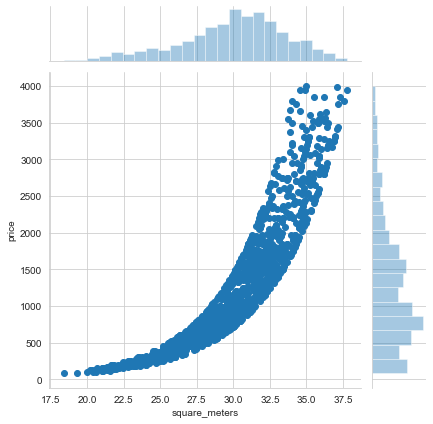

In [41]:
sns.jointplot(x="square_meters", y="price",data=df_filtered)

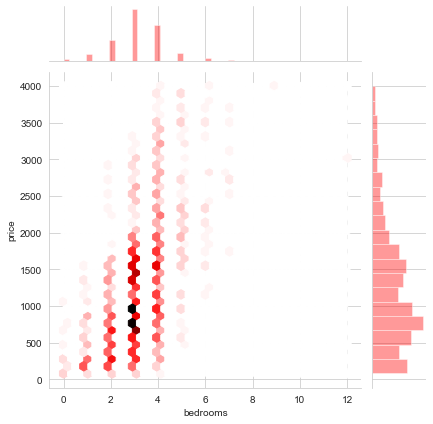

In [43]:
sns.jointplot(x="bedrooms",y="price",data=df_filtered, kind="hex",color="red")

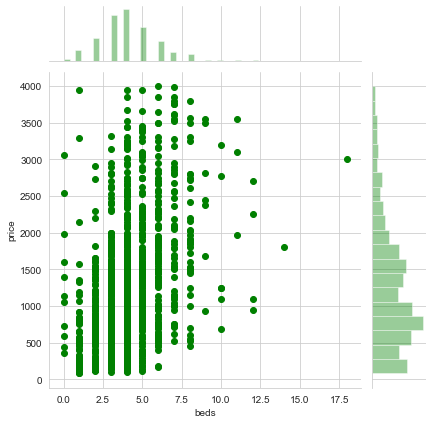

In [44]:
sns.jointplot(x="beds",y="price",data=df_filtered,color="green")

# Regression approach

In [46]:
X_cols = ['square_meters']

#Load the X data set
X = df_filtered[X_cols].values

#Initialize the data and column length variables
data_length = len(df_filtered)
column_length = len(df_filtered[X_cols].columns)

#Reshape and load remaining data sets
X = X.reshape(data_length,column_length)
y = df_filtered['price'].values
y = y.reshape(data_length,1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

#Create the linear regression object and train/fit models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Make predictions using the testing set
y_pred = lin_reg.predict(X_test)

# Take the results from above and print out a few pieces of information

In [47]:
#Print a few predictions
print((pd.DataFrame(y_pred, columns={'y_prediction'}).head(5)))
#Print the intercept
print('The intercept is: {}'.format(float(lin_reg.intercept_)))
#Print the coefficient(s)
print('The coefficient is : {}'.format(float(lin_reg.coef_)))
#Performance Metric: Mean Squared Error
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
#performance Metric: Root_Mean_Square_Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance Score (R^2):%.2f' % r2_score(y_test,y_pred))

   y_prediction
0   2660.616181
1   1213.145184
2    216.281898
3   1961.324026
4   2184.502373
The intercept is: -5082.609725618362
The coefficient is : 212.55080721855705
MSE: 151964.62887164275
RMSE: 389.8264086380536
Variance Score (R^2):0.78


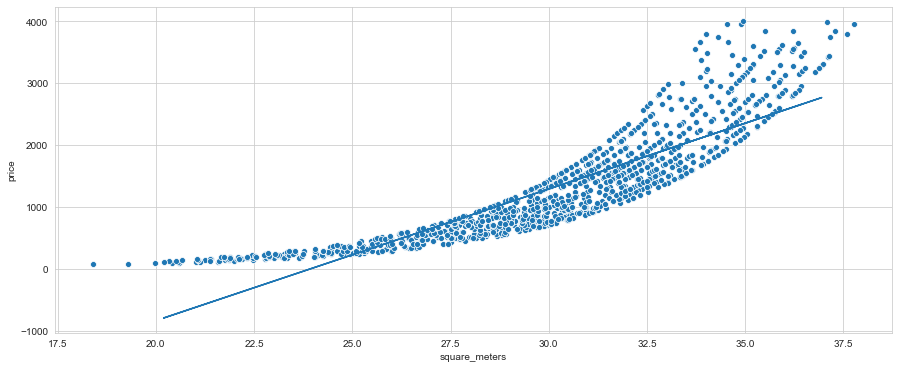

In [48]:
sns.scatterplot(x="square_meters", y="price",data=df_filtered)
plt.plot(X_test,y_pred)

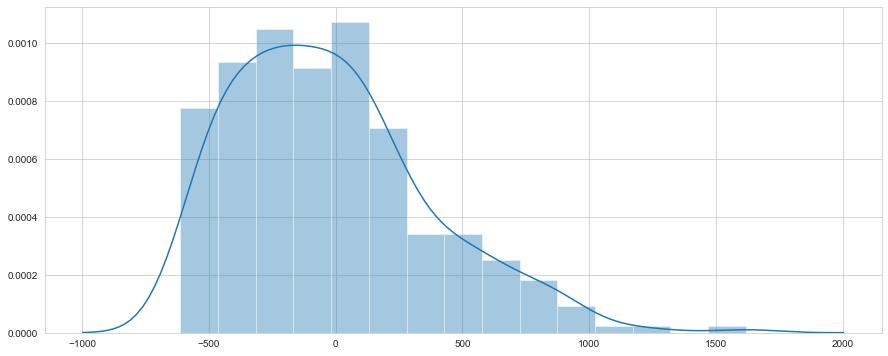

In [49]:
#Plot the residual
sns.distplot(y_test-y_pred)

#Repeat the previous analysis, but with a few more variables.

In [50]:
X2 = df_filtered[['square_meters','bathrooms','bedrooms','beds']] 
y2 =df_filtered['price']

In [51]:
#Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2)

In [52]:
#Create the linear regression object and train/fit models
lin_reg2= LinearRegression()
lin_reg2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
#Make predictions using the testing set
y_pred2 = lin_reg2.predict(X_test2)

In [54]:
X2.columns

Index(['square_meters', 'bathrooms', 'bedrooms', 'beds'], dtype='object')

In [55]:
cdf=pd.DataFrame(lin_reg2.coef_, X2.columns, columns=['coeff'])

In [56]:
cdf

,coeff
square_meters,197.232302
bathrooms,90.678668
bedrooms,53.515614
beds,-7.945235


# Take the results from above and print out a few pieces of information

In [57]:
#Print a few predictions
print((pd.DataFrame(y_pred2, columns={'y_prediction'}).head(5)))
#Print the intercept
print('The intercept is: {}'.format(float(lin_reg2.intercept_)))
#Print the coefficient(s)
#print(coeff_df2)
cdf=pd.DataFrame(lin_reg2.coef_,X2.columns,columns=['coeff'])
print(cdf)
#print('Coefficients: \n', lin_reg2.coef_)
#Performance Metric: Mean Squared Error
print('MSE:', metrics.mean_squared_error(y_test2, y_pred2))
#performance Metric: Root_Mean_Square_Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print('Variance Score (R^2):%.2f' % r2_score(y_test2,y_pred2))

   y_prediction
0   1184.384882
1   1480.234653
2   1253.162365
3   1900.084316
4   1481.951835
The intercept is: -4946.166408879679
                    coeff
square_meters  197.232302
bathrooms       90.678668
bedrooms        53.515614
beds            -7.945235
MSE: 142531.9562461151
RMSE: 377.5340464727851
Variance Score (R^2):0.79


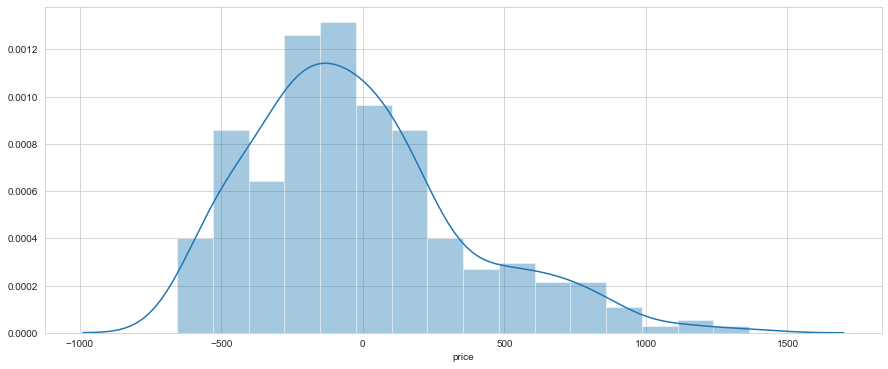

In [58]:
#Plot the residual
sns.distplot(y_test2-y_pred2)

# EXplore more neighbourhood

In [59]:

df["neighbourhood_cleansed"].value_counts()

BYRON SHIRE COUNCIL        2496
TWEED SHIRE COUNCIL         880
BALLINA SHIRE COUNCIL       453
LISMORE CITY COUNCIL        127
RICHMOND VALLEY COUNCIL      18
Name: neighbourhood_cleansed, dtype: int64

In [60]:
df_filtered = df_trimmed.loc[(df_trimmed['state'].isin(['NSW']))]
df_filtered = df_filtered.loc[(df_filtered['neighbourhood_cleansed'].isin(['BYRON SHIRE COUNCIL','TWEED SHIRE COUNCIL','BALLINA SHIRE COUNCIL']))]
df_filtered = df_filtered.loc[(df_filtered['property_type'] == 'House')]
df_filtered = df_filtered.loc[(df_filtered['room_type'] == 'Entire home/apt')]


Text(0, 0.5, 'price($)')

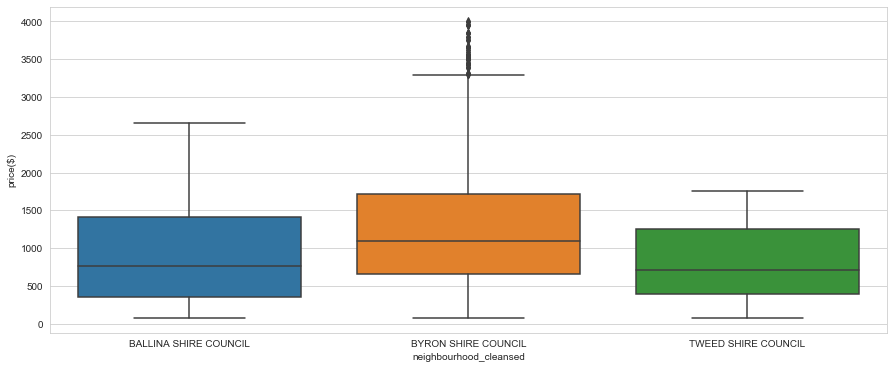

In [63]:
sns.boxplot(x="neighbourhood_cleansed",y="price",data=df_filtered)
plt.ylabel('price($)')

# Explore the price of TWEED SHIRE COUNCIL

In [64]:
df_filtered = df_filtered.loc[(df_filtered['neighbourhood_cleansed'].isin(['TWEED SHIRE COUNCIL']))]

variable -- 'square_meters'

In [65]:
X3 = df_filtered[['square_meters']] 
y3 =df_filtered['price']

In [66]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3)

In [67]:
lin_reg3= LinearRegression()
lin_reg3.fit(X_train3, y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y_pred3 = lin_reg3.predict(X_test3)

In [69]:
cdf3=pd.DataFrame(lin_reg3.coef_,X3.columns, columns = ['coeff'])

In [70]:
cdf3

,coeff
square_meters,-9.246404


In [71]:
#print a few predictions
print((pd.DataFrame(y_pred3, columns=['y_prediction']).head(5)))
#Print the intercept
print('The intercept is: {}'.format(float(lin_reg3.intercept_)))
#Print the coefficient(s)
print('The coefficient is : {}'.format(float(lin_reg3.coef_)))
#Performance Metric: Mean Squared Error
print('MSE:', metrics.mean_squared_error(y_test3, y_pred3))
#performance Metric: Root_Mean_Square_Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))
print('Variance Score (R^2):%.2f' % r2_score(y_test3,y_pred3))

   y_prediction
0    774.507241
1    789.024095
2    898.593977
3    740.295548
4    830.355519
The intercept is: 1275.7547783201776
The coefficient is : -9.246403564046643
MSE: 223403.94534856608
RMSE: 472.65626553402006
Variance Score (R^2):-0.03


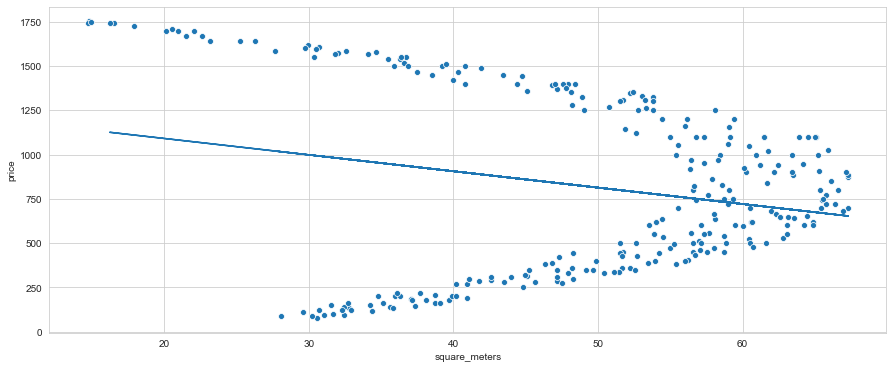

In [72]:
sns.scatterplot(x="square_meters", y="price",data=df_filtered)
plt.plot(X_test3,y_pred3)

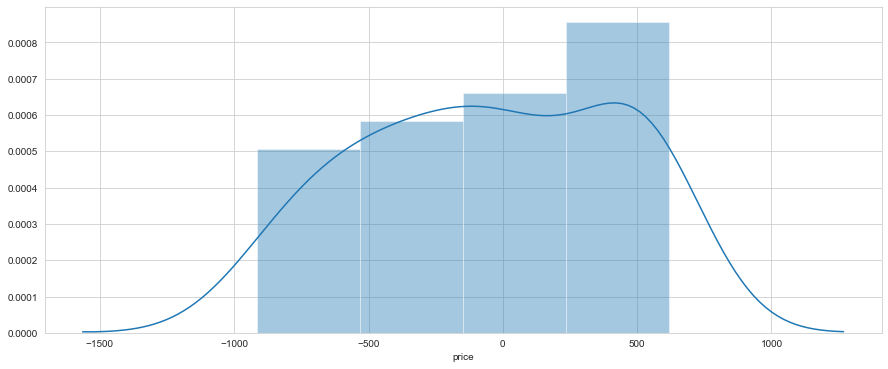

In [73]:
#Plot the residual
sns.distplot(y_test3-y_pred3)

Variables - 'square_meters' , 'bathrooms' , 'bedrooms' , 'beds'

In [74]:
X4 = df_filtered[['square_meters','bathrooms','bedrooms','beds']] 
y4 =df_filtered['price']

In [75]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4)

In [76]:
lin_reg4= LinearRegression()
lin_reg4.fit(X_train4, y_train4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
y_pred4 = lin_reg4.predict(X_test4)

In [78]:
#cdf4=pd.DataFrame(lin_reg4,X4.columns,X4.columns, columns=['coeff'])
cdf4=pd.DataFrame(lin_reg4.coef_,X4.columns, columns = ['coeff'])

In [79]:
cdf4

,coeff
square_meters,-10.917884
bathrooms,265.987045
bedrooms,66.465214
beds,-7.377872


In [80]:
#Print a few predictions
print((pd.DataFrame(y_pred4, columns={'y_prediction'}).head(5)))
#Print the intercept
print('The intercept is: {}'.format(float(lin_reg4.intercept_)))
#Print the coefficient(s)
print('Coefficients: \n', lin_reg4.coef_)
#Performance Metric: Mean Squared Error
print('MSE:', metrics.mean_squared_error(y_test4, y_pred4))
#performance Metric: Root_Mean_Square_Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test4, y_pred4)))
print('Variance Score (R^2):%.2f' % r2_score(y_test4,y_pred4))

   y_prediction
0    536.973142
1    885.010588
2    703.246720
3    524.654835
4    739.739840
The intercept is: 594.9583327721081
Coefficients: 
 [-10.91788414 265.98704459  66.46521445  -7.37787179]
MSE: 130994.72629834391
RMSE: 361.9319360022598
Variance Score (R^2):0.41


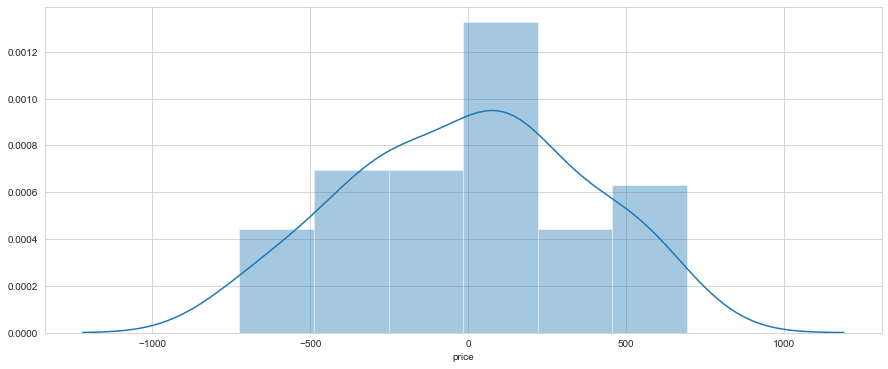

In [81]:
#Plot the residual
sns.distplot(y_test4-y_pred4)

# Explore the price of BALLINA SHIRE COUNCIL

In [82]:
df_filtered = df_trimmed.loc[(df_trimmed['state'].isin(['NSW']))]
df_filtered = df_filtered.loc[(df_filtered['neighbourhood_cleansed'].isin(['BALLINA SHIRE COUNCIL']))]
df_filtered = df_filtered.loc[(df_filtered['property_type'] == 'House')]
df_filtered = df_filtered.loc[(df_filtered['room_type'] == 'Entire home/apt')]

variable -- 'square_meters'

In [83]:
X5 = df_filtered[['square_meters']] 
y5 =df_filtered['price']

In [84]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5)

In [85]:
lin_reg5= LinearRegression()
lin_reg5.fit(X_train5, y_train5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
y_pred5 = lin_reg5.predict(X_test5)

In [87]:
#print a few predictions
print((pd.DataFrame(y_pred5, columns={'y_prediction'}).head(5)))
#Print the intercept
print('The intercept is: {}'.format(float(lin_reg5.intercept_)))
#Print the coefficient(s)
print('The coefficient is : {}'.format(float(lin_reg5.coef_)))
#Performance Metric: Mean Squared Error
print('MSE:', metrics.mean_squared_error(y_test5, y_pred5))
#performance Metric: Root_Mean_Square_Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test5, y_pred5)))
print('Variance Score (R^2):%.2f' % r2_score(y_test5,y_pred5))

   y_prediction
0    475.877510
1    208.541188
2   1596.676649
3    735.943178
4    384.155424
The intercept is: -1207.5583239853277
The coefficient is : 55.92810078373171
MSE: 35911.27279775645
RMSE: 189.50269865560344
Variance Score (R^2):0.89


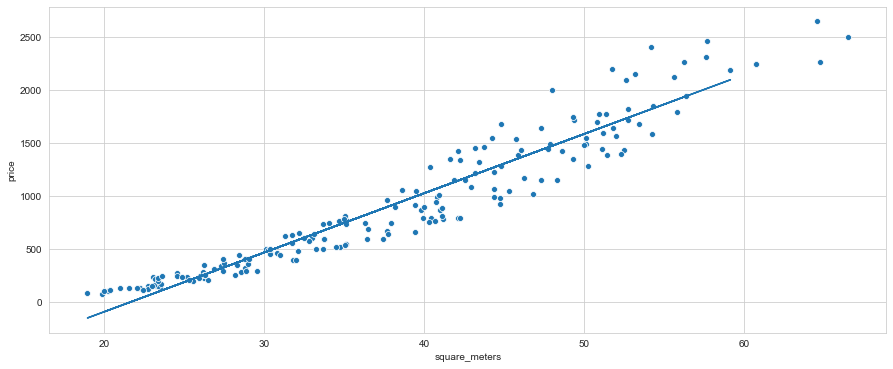

In [88]:
sns.scatterplot(x="square_meters", y="price",data=df_filtered)
plt.plot(X_test5,y_pred5)

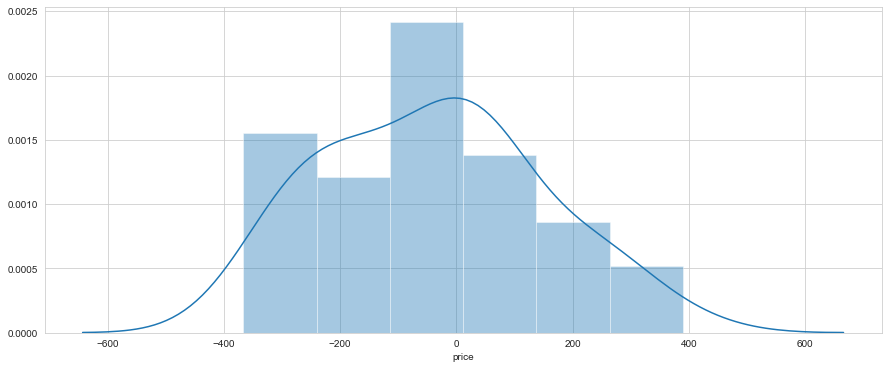

In [89]:
#Plot the residual
sns.distplot(y_test5-y_pred5)

Variables - 'square_meters' , 'bathrooms' , 'bedrooms' , 'beds'

In [90]:
X6 = df_filtered[['square_meters','bathrooms','bedrooms','beds']] 
y6 =df_filtered['price']

In [91]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6)

In [92]:
lin_reg6= LinearRegression()
lin_reg6.fit(X_train6, y_train6)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
y_pred6 = lin_reg6.predict(X_test6)

In [94]:
#Print a few predictions
print((pd.DataFrame(y_pred6, columns={'y_prediction'}).head(5)))
#Print the intercept
print('The intercept is: {}'.format(float(lin_reg6.intercept_)))
#Print the coefficient(s)
print('Coefficients: \n', lin_reg6.coef_)
#Performance Metric: Mean Squared Error
print('MSE:', metrics.mean_squared_error(y_test6, y_pred6))
#performance Metric: Root_Mean_Square_Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test6, y_pred6)))
print('Variance Score (R^2):%.2f' % r2_score(y_test6,y_pred6))

   y_prediction
0    270.998706
1    447.673038
2    159.680260
3   1530.443102
4     61.720396
The intercept is: -1209.6192408461634
Coefficients: 
 [53.7935918  53.5476576  -6.1683527  -4.07213594]
MSE: 30319.560658734434
RMSE: 174.12512931433656
Variance Score (R^2):0.92


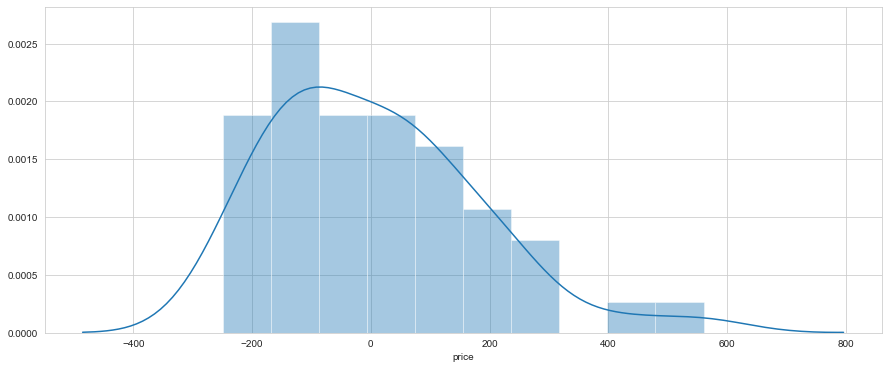

In [98]:
#Plot the residual
sns.distplot(y_test6-y_pred6,bins=10)

# Conclusion:

1.In the state NSW, when the property type is House and the room type is Entire home/apt, the regression model is better when taking more variables('square_meters','bathrooms','bedrooms','beds') into consideration than only use 'square_meters' as variable

2.In the state NSW, when the property type is House, the room type is Entire home/apt, the BALLINA SHIRE COUNCIL has the best regression model to predict price comparing with BYRON SHIRE COUNCIL and TWEED SHIRE COUNCIL

3.In the state NSW, when the property type is House, the room type is Entire home/apt, TWEED SHIRE COUNCIL does not have a good linear regression to predict price

4.In the state NSW, when the property type is House, the room type is Entire home/apt, BYRON SHIRE COUNCIL's house price is higher than BALLINA SHIRE COUNCIL and TWEED SHIRE COUNCIL

5.BALLINA SHIRE COUNCIL is the area that I most comfortable providing pricing recommendations. Because the price prediction regression model has a high R^2 which equal to 0.92 and low RMSE:174.1(round). Plus, the residual is approximately normal distribution. So, the model is reliable to make price predictions.

6.TWEED SHIRE COUNCIl is the area that I least comfortable providing pricing recommendations. Because the price prediction regression model has a low R^2 which equal to -0.03 which means there is no linear relationship between the price and squar meters. Plus, the coefficient of 'square_meters' is -9.24(round), which is abnormal in real life. So, the model is not reliable to make price prediction.



